In [41]:
# Text mining packages
library(qdap)
#library(rvest)
#library(SnowballC)
library(tm)

In [30]:
lincoln_movie_review = 'Beginning as the Civil War is approaching its end, Steven Spielberg’s Lincoln follows President Abraham Lincoln (Daniel Day-Lewis) as he tries to secure the passage of the 13th Amendment, which would end slavery. Wanting Congress to pass the amendment before the Confederate states return to the Union, Lincoln must wrangle votes from not only the Democratic opposition, but fellow Republicans such as Thaddeus Stevens (Tommy Lee Jones), who has a more radical vision for the future of the nation. Lincoln is a stately drama, with immaculate direction, a script of towering power, and an incredible performance by Day-Lewis.'

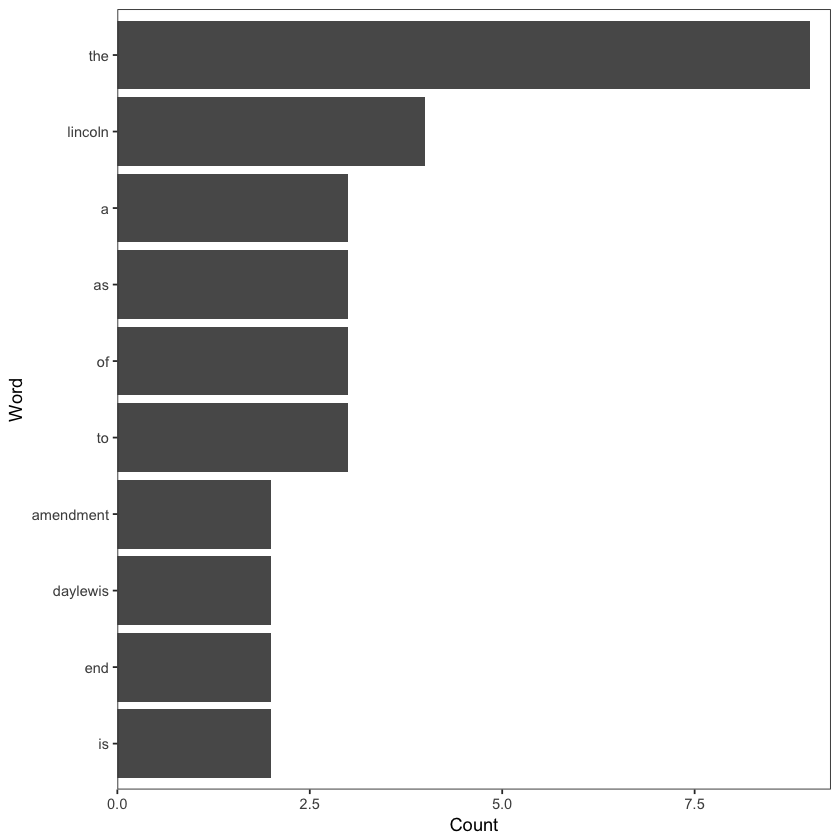

In [32]:
#print (lincoln_movie_review)

# Find the 10 most frequent terms: term_count
term_count <- freq_terms(lincoln_movie_review, 10) #10

# Plot term_count
plot(term_count)

# Advanced text mining with Coffee dataset

In [34]:
tweets <- read.csv('../data/coffee.csv', stringsAsFactors=FALSE)
str(tweets)
head(tweets)

'data.frame':	1000 obs. of  13 variables:
 $ num         : int  1 2 3 4 5 6 7 8 9 10 ...
 $ text        : chr  "@ayyytylerb that is so true drink lots of coffee" "RT @bryzy_brib: Senior March tmw morning at 7:25 A.M. in the SENIOR lot. Get up early, make yo coffee/eakfast, "| __truncated__ "If you believe in #gunsense tomorrow would be a very good day to have your coffee any place BUT tarbucks Guns+C"| __truncated__ "My cute coffee mug. http://t.co/2udvMU6XIG" ...
 $ favorited   : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ replyToSN   : chr  "ayyytylerb" "<NA>" "<NA>" "<NA>" ...
 $ created     : chr  "08/09/13 2:43" "08/09/13 2:43" "08/09/13 2:43" "08/09/13 2:43" ...
 $ truncated   : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ replyToSID  : num  3.66e+17 NA NA NA NA ...
 $ id          : num  3.66e+17 3.66e+17 3.66e+17 3.66e+17 3.66e+17 ...
 $ screenName  : chr  "thejennagibson" "carolynicosia" "janeCkay" "AlexandriaOOTD" ...
 $ retweetCount: int  0 1 0 0 2 0 0 0 1 2 ...
 $ r

num,text,favorited,replyToSN,created,truncated,replyToSID,id,screenName,retweetCount,retweeted,longitude,latitude
1,@ayyytylerb that is so true drink lots of coffee,FALSE,ayyytylerb,08/09/13 2:43,FALSE,3.66e+17,3.66e+17,thejennagibson,0,FALSE,NA,NA
2,"RT @bryzy_brib: Senior March tmw morning at 7:25 A.M. in the SENIOR lot. Get up early, make yo coffee/eakfast, cus this will only happen ?",FALSE,<NA>,08/09/13 2:43,FALSE,NA,3.66e+17,carolynicosia,1,FALSE,NA,NA
3,If you believe in #gunsense tomorrow would be a very good day to have your coffee any place BUT tarbucks Guns+Coffee=#nosense @MomsDemand,FALSE,<NA>,08/09/13 2:43,FALSE,NA,3.66e+17,janeCkay,0,FALSE,NA,NA
4,My cute coffee mug. http://t.co/2udvMU6XIG,FALSE,<NA>,08/09/13 2:43,FALSE,NA,3.66e+17,AlexandriaOOTD,0,FALSE,NA,NA
5,RT @slaredo21: I wish we had Starbucks here... Cause coffee dates in the morning sound perff!,FALSE,<NA>,08/09/13 2:43,FALSE,NA,3.66e+17,Rooosssaaaa,2,FALSE,NA,NA
6,Does anyone ever get a cup of coffee before a cocktail??,FALSE,<NA>,08/09/13 2:43,FALSE,NA,3.66e+17,E_Z_MAC,0,FALSE,NA,NA


In [46]:
coffee_tweets <- tweets$text
coffee_source <- VectorSource(coffee_tweets) #Vector Source
coffee_corpus <- VCorpus(coffee_source) #Volatile corpus

print (coffee_corpus)
print (coffee_corpus[[15]]) #Printing 15th tweet in coffee_corpus
print (coffee_corpus[[15]][1]) #Printing contents of the 15th tweet in coffee_corpus

<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 0
Content:  documents: 1000
<<PlainTextDocument>>
Metadata:  7
Content:  chars: 108
$content
[1] "@HeatherWhaley I was about 2 joke it takes 2 hands to hold hot coffee...then I read headline! n'tDrinkNShoot"



# Preprocessing

In [48]:
clean_corpus <- function(corpus){
  corpus <- tm_map(corpus, stripWhitespace)
  corpus <- tm_map(corpus, removePunctuation)
  corpus <- tm_map(corpus, content_transformer(tolower))
  corpus <- tm_map(corpus, removeWords, c(stopwords("en"), "coffee", "mug"))
  return(corpus)
}

clean_corp <- clean_corpus(coffee_corpus)
print (clean_corp[[227]][1]) #Cleaned up tweet
tweets$text[227] #Original tweet

$content
[1] "also dogs arent smart enough  dip  donut      eat  part thats  dipped yandthetramp"



[1] "Also, dogs aren't smart enough to dip the donut in the coffee and then eat the part that's been dipped. yandthetramp"

# Document Term Matrix

In [ ]:
coffee_dtm <- DocumentTermMatrix(clean_corp)
print (coffee_dtm)

# Convert coffee_dtm to a matrix: coffee_m
coffee_m <- as.matrix(coffee_dtm) #To matrix
print (dim(coffee_m))

# Review a portion of the matrix
print (coffee_m[148:150, 2587:2590])